In [1]:
# Third party
import importlib
import torch
import matplotlib.pyplot as plt

# User
import base.abstract
import base.mlp
import base.train
import base.encode
import base.pre_process
import model
import attention

importlib.reload(base.abstract)
importlib.reload(base.mlp)
importlib.reload(base.train)
importlib.reload(base.encode)
importlib.reload(base.pre_process)
importlib.reload(base.norm)
importlib.reload(model)
importlib.reload(attention)

from base.train import sgd
from base.encode import get_encoder_decoder
from base.mlp import LinearLayer, MLP
from base.train import sgd
from base.pre_process import get_dataset
from model import SimpleTransformer, Transformer
from attention import BatchedSelfAttentionHead
from encode import positional_encode

In [2]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))

In [3]:
token_length = 32
dataset =  get_dataset(text_encoded, token_length, context_window="expanding")
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data)


(948085, 167309)

In [4]:

g = torch.Generator().manual_seed(2147483647)

hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "epochs": 5000,
    "dim_of_embedding": 10,
    "num_layer_1_nodes": 15,
    "mini_batch_size": 3,
    "token_length": token_length,
}

params = {
    "num_of_unique_chars": len(unique_chars),
    "positional_encoding_func": positional_encode,
    "attention_block_type": "decoder"
}

l1 = LinearLayer(
    num_of_inputs=hp['dim_of_embedding'], #3x8x3 3x10 = 3x8x10
    num_of_neurons=hp["num_layer_1_nodes"],
    activation_func=torch.tanh,
    generator=g
)
l2 = LinearLayer(
    num_of_inputs=hp["num_layer_1_nodes"],
    num_of_neurons=hp["dim_of_embedding"],
    activation_func=torch.tanh,
    generator=g
)

mlp_model = MLP(layers=[l1,l2])
attention_model = SimpleTransformer(hp, mlp_model, generator=g, **params)



In [17]:
attention_model.require_grad()
loss_list = []
sgd(hp
    , attention_model
    , training_inputs=train_data
    , training_targets=train_targets
    , loss_list=loss_list
)


epoch: 0 / 5000, loss: 17.7756
epoch: 200 / 5000, loss: 11.9667
epoch: 400 / 5000, loss: 6.5477
epoch: 600 / 5000, loss: 5.7276
epoch: 800 / 5000, loss: 4.9729
epoch: 1000 / 5000, loss: 4.7452
epoch: 1200 / 5000, loss: 4.3639
epoch: 1400 / 5000, loss: 4.2335
epoch: 1600 / 5000, loss: 3.9021
epoch: 1800 / 5000, loss: 3.6653
epoch: 2000 / 5000, loss: 3.9079
epoch: 2200 / 5000, loss: 3.7370
epoch: 2400 / 5000, loss: 3.6375
epoch: 2600 / 5000, loss: 3.7243
epoch: 2800 / 5000, loss: 4.2906
epoch: 3000 / 5000, loss: 3.4927
epoch: 3200 / 5000, loss: 3.9136
epoch: 3400 / 5000, loss: 4.0152
epoch: 3600 / 5000, loss: 3.4438
epoch: 3800 / 5000, loss: 3.8420
epoch: 4000 / 5000, loss: 3.6569
epoch: 4200 / 5000, loss: 3.5650
epoch: 4400 / 5000, loss: 3.5271
epoch: 4600 / 5000, loss: 3.5728
epoch: 4800 / 5000, loss: 3.8662


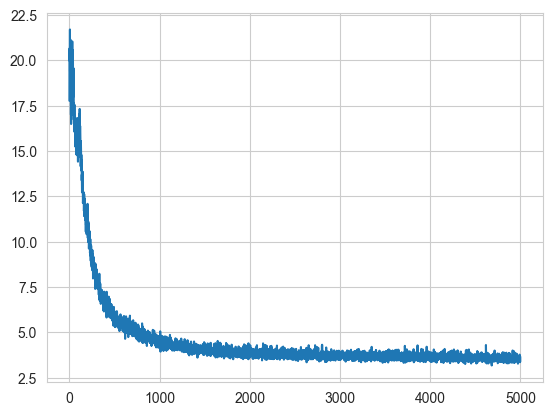

In [18]:
plt.plot(loss_list)


In [21]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {attention_model.dataset_loss(train_data, train_targets)}")
print(f"validation loss: {attention_model.dataset_loss(validation_data, validation_targets)}" )

KeyboardInterrupt: 

In [15]:
print(decoder(attention_model.generate(1000)))

U hh ;aeehe
 oetfrsh mPsacen  ;sl Ewahue
teewdish'u  arcoo ektav  eLt 
eer cb InChrwFuoe Unst nDsgCsIeHNsa:the 
paToh:  uhenuuenmgyeeraeryI euR w sPwrrbsw h mn.h
ey etyb f ehiN zrcd hesposrme
 meyer?I
itTeoo rs S  rewttenE m
.ad fT DldT esyey
sp:g,er,snBr, ebro TedsP aofNsetauyo.timhtoswcsot
vitrifienasNgkucO,p n 
,rhhcnraeicnogtsao
g n n byevecItsett eb

iaA O
keiii y e' m t unshfshbaw:hDpefigohnNs
n
or

mrxrnwluia
cwact tnerU eti nrs:Wi:Idtrq:vsa usiqn   odecoopCliauio lIabeu itef
e e  t eI  vhvoeMolwip neRmt mlnsaDkNae.o h.ssveKimcl
m tignusdpei hiieb-i
 D,aenry oenhoh ysi
,trtau e
nmuhWwl  emyhahr
Aid:,crteRYrcddokDdu.e Atr tbseat
n,etdeeFmkaye
el.grn,hsesophtBFrhC mhdshy h 'ndt t seTiest
 st oyrttelT  enph 
e 'ymeede ttegtyo rsn-ayde he saaiat
;s
 enSs n wehro ,iwimcrntIh-emlet.iuteS hfseIm ?lnoh
sebian Sm-iehitohf
betsehre unoy nruAiTg

 Tlo- oopd eia
streih
 tueOh,m 
F o u:ot seIwui ictsio   wIwb,Iit
edVj
gearB slse'k ha doyttlt ;Iwdt swmuCmtI?fg bi
es
uae tkuCritpeo,hh oe 
tda 

In [9]:
my_data = train_data[[306]]
characters =  decoder(my_data[0].tolist())
my_data, characters 

(tensor([[43, 58,  1, 59, 57,  1, 49, 47, 50, 50]]), 'et us kill')

In [19]:
torch.set_printoptions(sci_mode=False)
matrix = attention_model.inspect_attention(my_data)[1][0] # this is the weight matrix
matrix
#    F i r
# F  1 0 0
# i  0 1 0
# r  0 1 0

NameError: name 'my_data' is not defined

In [20]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matrix.detach().numpy(), annot=True, cmap='viridis', xticklabels=characters, yticklabels=characters, fmt='.3f')

# Move the x-axis to the top and set its label position
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# You can add title and labels as needed
plt.title('Attention Matrix Visualization')
plt.xlabel('Characters (columns)')
plt.ylabel('Characters (rows)')

plt.show()

NameError: name 'matrix' is not defined

<Figure size 1000x800 with 0 Axes>